In [1]:
import open3d
import numpy as np
import pandas as pd
import os
import tqdm
import copy

import matplotlib.pyplot as plt
import utils.registration as registration
import utils.functions as functions
import utils.transform as transform
import utils.pointcloud as pointcloud
import utils.fread as fread
import utils.FCGF as FCGF

from utils.config import Config
from scipy.ndimage import gaussian_filter1d

In [13]:
config = Config(
    sequence_dir="data/raw_data",
    feature_dir="data/features",
    output_dir="data/trajectories/local/FPFH_outlier_removed",
    experiment="exp_12",
    trial="trial_1",
    subject="subject-1",
    sequence="01",
    groundtruth_dir="data/trajectories/groundtruth",
)

config.voxel_size=0.05
config.target_fps=20
config.min_std=0.5

In [14]:
output_file = config.get_output_file(f"{config.get_file_name()}.npz")

data = np.load(output_file)

sequence_ts = data["sequence_ts"]
trajectory_t = data["trajectory_t"]
local_t = data["local_t"]

feature_dir = config.get_feature_dir()

num_frames = len(sequence_ts)

local_pcds = []

for t in tqdm.trange(num_frames):
    if np.sum(local_t[t]) == 4:
        continue
    
    feature_file = os.path.join(feature_dir, f"{sequence_ts[t]}.secondary.npz")
    pcd = FCGF.get_features(feature_file, config.voxel_size, pcd_only=True)
    pcd.paint_uniform_color(pointcloud.random_color())
    pcd.transform(trajectory_t[t])
    local_pcds.append(pcd)
    
trajectory_pcd = pointcloud.merge_pcds(local_pcds, config.voxel_size)


100%|██████████| 419/419 [00:06<00:00, 64.12it/s]


In [26]:
pointcloud.view(trajectory_pcd)

In [15]:
xyz = trajectory_t[:, :3, 3]

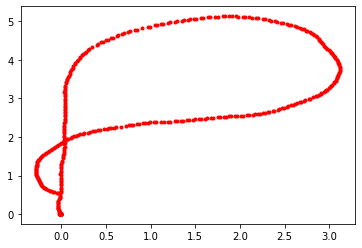

In [16]:
plt.plot(xyz[:, 0], xyz[:, 2], 'r.')

In [24]:
config = Config(
    sequence_dir="data/raw_data",
    feature_dir="data/features",
    output_dir="data/trajectories/trajectory/IMU_PCD_outlier_removed_0.05",
    experiment="exp_12",
    trial="trial_1",
    subject="subject-1",
    sequence="01",
    groundtruth_dir="data/trajectories/groundtruth",
)

config.voxel_size=0.05
config.target_fps=20
config.min_std=0.5

output_file = config.get_output_file(f"{config.get_file_name()}.npz")

data = np.load(output_file)

global_t = data["global_t"]

In [27]:
methods = ["FPFH_outlier_removed", "FPFH_outlier_removed_0.05", "IMU_PCD_outlier_removed", "IMU_PCD_outlier_removed_0.05"]

In [51]:
def plot(config: Config, methods: list):
    plt.figure(figsize=(10, 10))
    for m in methods:
        config.output_dir = f"data/trajectories/trajectory/{m}"
        
        data = np.load(config.get_output_file(f"{config.get_file_name()}.npz"))
        global_t = data["global_t"]
        
        xyz = global_t[:, :3, 3]
        plt.plot(xyz[:, 0], xyz[:, 2], '.', label=m)
        
    plt.legend()
    plt.title(config.get_file_name())
    plt.savefig(f"results/trajectories/{config.get_file_name()}.jpg")
    plt.close()

In [52]:
config = Config(
    sequence_dir="data/raw_data",
    feature_dir="data/features",
    output_dir="data/trajectories/trajectory/FPFH_outlier_removed_0.05",
    experiment="exp_12",
    trial="trial_2",
    subject="subject-1",
    sequence="02",
    groundtruth_dir="data/trajectories/groundtruth",
)

config.voxel_size=0.05
config.target_fps=20
config.min_std=0.5

for trial in os.listdir(os.path.join(config.feature_dir, config.experiment)):
    config.trial = trial
    for subject in os.listdir(os.path.join(config.feature_dir, config.experiment, config.trial, str(config.voxel_size))):
        config.subject = subject    
        for sequence in os.listdir(os.path.join(config.feature_dir, config.experiment, config.trial, str(config.voxel_size), config.subject)):
            config.sequence = sequence
            print(f"Processing: {config.experiment} >> {config.trial} >> {config.subject} >> {config.sequence}")
            plot(config, methods)

Processing: exp_12 >> trial_1 >> subject-1 >> 01
Processing: exp_12 >> trial_1 >> subject-1 >> 02
Processing: exp_12 >> trial_1 >> subject-1 >> 03
Processing: exp_12 >> trial_1 >> subject-1 >> 04
Processing: exp_12 >> trial_1 >> subject-1 >> 05
Processing: exp_12 >> trial_2 >> subject-1 >> 01
Processing: exp_12 >> trial_2 >> subject-1 >> 02
Processing: exp_12 >> trial_2 >> subject-1 >> 03
Processing: exp_12 >> trial_2 >> subject-1 >> 04
Processing: exp_12 >> trial_2 >> subject-1 >> 05
Processing: exp_12 >> trial_3 >> subject-1 >> 01
Processing: exp_12 >> trial_3 >> subject-1 >> 02
Processing: exp_12 >> trial_3 >> subject-1 >> 03
Processing: exp_12 >> trial_3 >> subject-1 >> 04
Processing: exp_12 >> trial_3 >> subject-1 >> 05
